# WeatherPy

Weather Analysis Report
Introduction
This report aims to analyze the relationship between various weather parameters and latitude. Latitude serves as a proxy for geographical location, allowing us to examine how different weather attributes vary with proximity to the equator.

Methodology
To conduct this analysis, data was collected from various cities around the world, including information on latitude, temperature, cloudiness, wind speed, and humidity. The data was then analyzed to identify any patterns or correlations between these variables.

Findings
Temperature vs. Latitude
There is a clear correlation between temperature and latitude. As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). Specifically, the southern hemisphere tends to experience warmer temperatures compared to the northern hemisphere.

Cloudiness vs. Latitude
There is no strong relationship between latitude and cloudiness. However, it is interesting to note the presence of a strong band of cities near 0, 80, and 90% cloudiness. This suggests that certain latitudes may experience more consistent cloud cover compared to others.

Wind Speed vs. Latitude
Similarly, there is no strong relationship between latitude and wind speed. However, in the northern hemisphere, there is a notable concentration of cities experiencing wind speeds exceeding 20 mph. Overall, wind speeds tend to range between 0 and 15 mph regardless of latitude.

Humidity vs. Latitude
Humidity also shows no strong relationship with latitude. However, there is a slightly larger cluster of cities in the northern hemisphere experiencing high humidity levels (above 60%). This may be attributed to regional climatic factors and atmospheric conditions.

Conclusion
In conclusion, latitude appears to have a significant impact on temperature, with warmer climates observed closer to the equator. However, other weather parameters such as cloudiness, wind speed, and humidity show less pronounced relationships with latitude. This analysis provides valuable insights into global weather patterns and can aid in understanding regional climate variations.
---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | oranjemund
Processing Record 5 of Set 1 | mana
Processing Record 6 of Set 1 | berdigestyakh
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | raja
Processing Record 13 of Set 1 | nova sintra
Processing Record 14 of Set 1 | cullinan
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | guiratinga
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | kalmunai
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | afaahiti
Processing Record 22 of Set 1 | tiksi
Pr

In [30]:
len(city_data)

561

In [31]:
city_data

[{'City': 'edinburgh of the seven seas',
  'Lat': -37.0676,
  'Lng': -12.3116,
  'Max Temp': 18.56,
  'Humidity': 92,
  'Cloudiness': 100,
  'Wind Speed': 9.28,
  'Country': 'SH',
  'Date': 1712596084},
 {'City': 'talnakh',
  'Lat': 69.4865,
  'Lng': 88.3972,
  'Max Temp': -7.66,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 4.63,
  'Country': 'RU',
  'Date': 1712596045},
 {'City': 'albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 18.15,
  'Humidity': 32,
  'Cloudiness': 92,
  'Wind Speed': 0.89,
  'Country': 'US',
  'Date': 1712596063},
 {'City': 'oranjemund',
  'Lat': -28.55,
  'Lng': 16.4333,
  'Max Temp': 15.49,
  'Humidity': 87,
  'Cloudiness': 48,
  'Wind Speed': 3.33,
  'Country': 'NA',
  'Date': 1712595864},
 {'City': 'mana',
  'Lat': 5.6592,
  'Lng': -53.7767,
  'Max Temp': 30.16,
  'Humidity': 63,
  'Cloudiness': 95,
  'Wind Speed': 4.57,
  'Country': 'GF',
  'Date': 1712596141},
 {'City': 'berdigestyakh',
  'Lat': 62.0989,
  'Lng': 126.6992,
  'Max Temp':

In [6]:
city_weather

{'coord': {'lon': 142.9478, 'lat': 53.5739},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': -8.19,
  'feels_like': -12.36,
  'temp_min': -8.19,
  'temp_max': -8.19,
  'pressure': 1014,
  'humidity': 98},
 'visibility': 6787,
 'wind': {'speed': 2.24, 'deg': 315, 'gust': 3.58},
 'clouds': {'all': 37},
 'dt': 1712596044,
 'sys': {'type': 2,
  'id': 49610,
  'country': 'RU',
  'sunrise': 1712605333,
  'sunset': 1712654217},
 'timezone': 39600,
 'id': 2122614,
 'name': 'Okha',
 'cod': 200}

In [7]:
# To compare the data from below

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [9]:
# Compare the data from below
#Display sample data
city_data_df.head()


city_data_df["Date"]=(pd.to_datetime(city_data_df["Date"],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,18.56,92,100,9.28,SH,2024-04-08
1,talnakh,69.4865,88.3972,-7.66,94,100,4.63,RU,2024-04-08
2,albany,42.6001,-73.9662,18.15,32,92,0.89,US,2024-04-08
3,oranjemund,-28.5500,16.4333,15.49,87,48,3.33,NA,2024-04-08
4,mana,5.6592,-53.7767,30.16,63,95,4.57,GF,2024-04-08


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,18.56,92,100,9.28,SH,2024-04-08
1,talnakh,69.4865,88.3972,-7.66,94,100,4.63,RU,2024-04-08
2,albany,42.6001,-73.9662,18.15,32,92,0.89,US,2024-04-08
3,oranjemund,-28.5500,16.4333,15.49,87,48,3.33,NaN,2024-04-08
4,mana,5.6592,-53.7767,30.16,63,95,4.57,GF,2024-04-08


In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

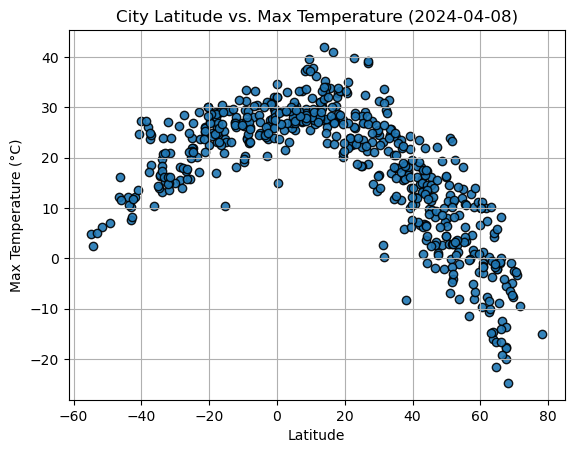

In [14]:
# Creating a scatter plot for latitude versus temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.9, edgecolors="k")

# Adding additional graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
date = city_data_df["Date"].min()
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid()

# Saving the figure
plt.savefig("../output_data/Fig_1.png")

# Displaying the plot
plt.show()

#### Latitude Vs. Humidity

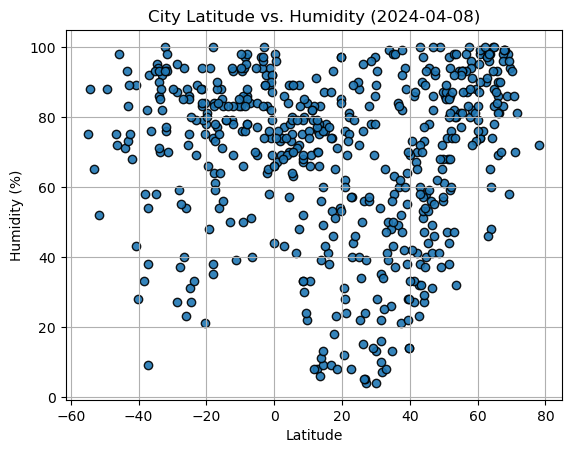

In [15]:
# Creating scatter plots for latitude versus humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.9, edgecolors="k")

# Adding additional graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
date = city_data_df["Date"].min()
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid()

# Saving the figure
plt.savefig("../output_data/Fig_2.png")

# Displaying the plot
plt.show()

#### Latitude Vs. Cloudiness

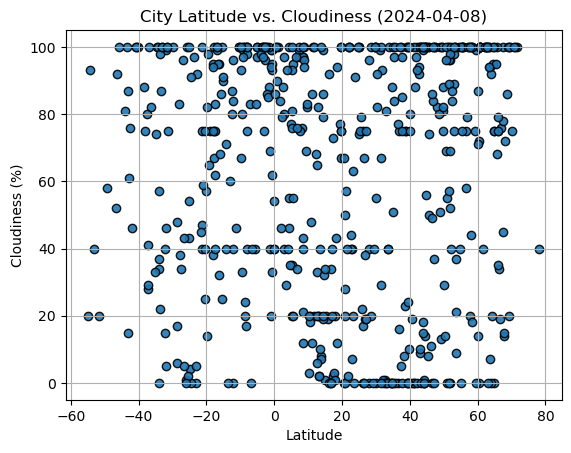

In [16]:
# Creating scatter plots for latitude versus cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.9, edgecolors="k")

# Adding additional graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
date = city_data_df["Date"].min()
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid()

# Saving the figure
plt.savefig("../output_data/Fig_3.png")

# Displaying the plot
plt.show()

#### Latitude vs. Wind Speed Plot

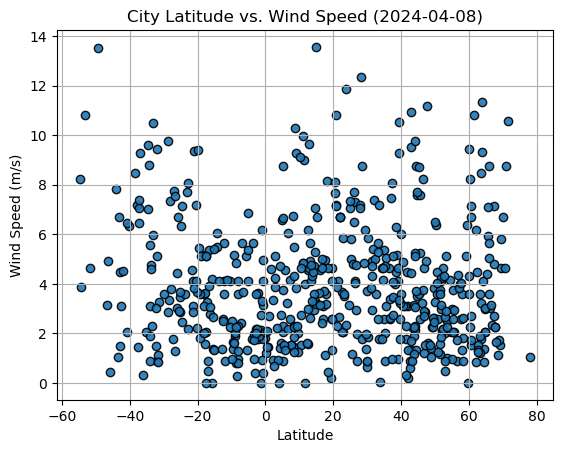

In [17]:
# Creating scatter plots for latitude versus wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.9, edgecolors="k")

# Adding additional graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
date = city_data_df["Date"].min()
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid()

# Saving the figure
plt.savefig("../output_data/Fig_4.png")

# Displaying the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept

#equation of a line, y = mx + c
#line = f"y = (round(slope,2))x + (round(intercept,2))"

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,talnakh,69.4865,88.3972,-7.66,94,100,4.63,RU,2024-04-08
2,albany,42.6001,-73.9662,18.15,32,92,0.89,US,2024-04-08
4,mana,5.6592,-53.7767,30.16,63,95,4.57,GF,2024-04-08
5,berdigestyakh,62.0989,126.6992,-7.72,98,100,0.83,RU,2024-04-08
7,jamestown,42.0970,-79.2353,14.77,41,100,3.09,US,2024-04-08


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,18.56,92,100,9.28,SH,2024-04-08
3,oranjemund,-28.5500,16.4333,15.49,87,48,3.33,NaN,2024-04-08
6,port mathurin,-19.6833,63.4167,26.97,81,14,5.43,MU,2024-04-08
8,port-aux-francais,-49.3500,70.2167,6.96,88,58,13.50,TF,2024-04-08
9,waitangi,-43.9535,-176.5597,12.12,71,81,7.81,NZ,2024-04-08


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.861616490303392


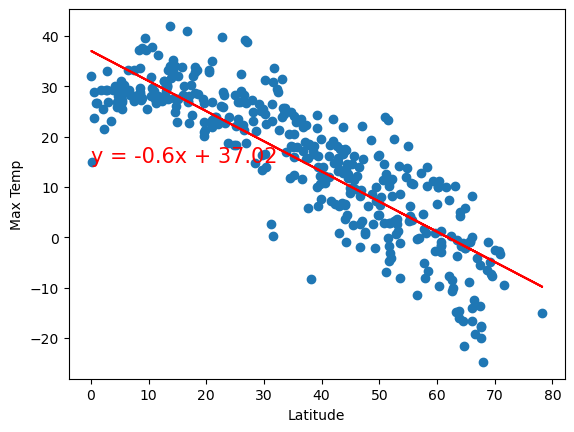

In [21]:
# Linear regression on Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (0, 15), fontsize=15, color="red")
print(f'The r-value is {r_value}')

The r-value is 0.749553001048942


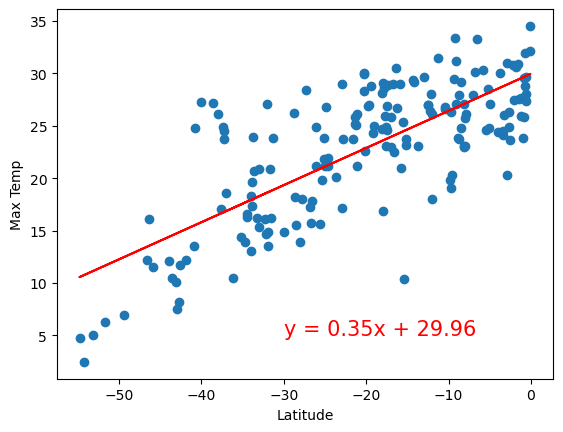

In [22]:
# Linear regression on Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (-30, 5), fontsize=15, color="red")
print(f'The r-value is {r_value}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.2853579301276736


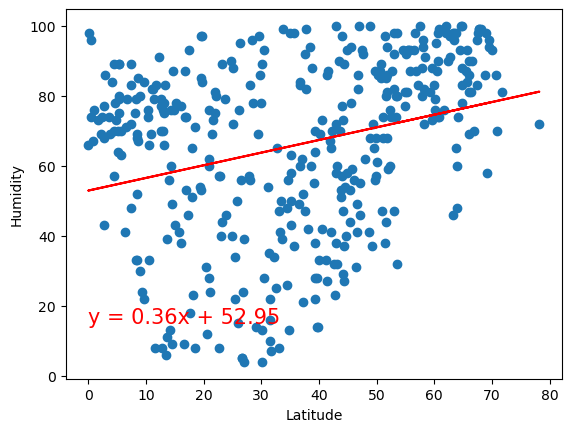

In [23]:
# Northern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope, intercept, r_value, p_value, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (0, 15), fontsize=15, color="red")
print(f'The r-value is {r_value}')


The r-value is 0.14265867263976628


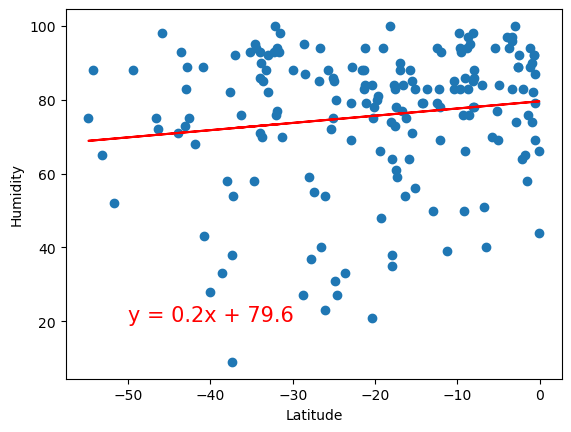

In [24]:
# Southern Hemisphere
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope, intercept, r_value, p_value, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
print(f'The r-value is {r_value}')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.14806817486978188


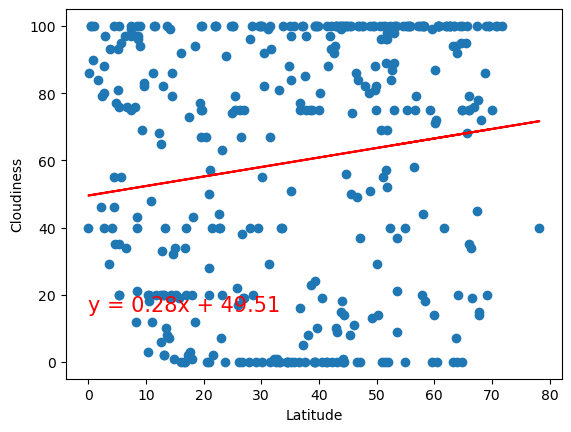

In [25]:
# Northern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (0, 15), fontsize=15, color="red")
print(f'The r-value is {r_value}')


The r-value is 0.1852056879940374


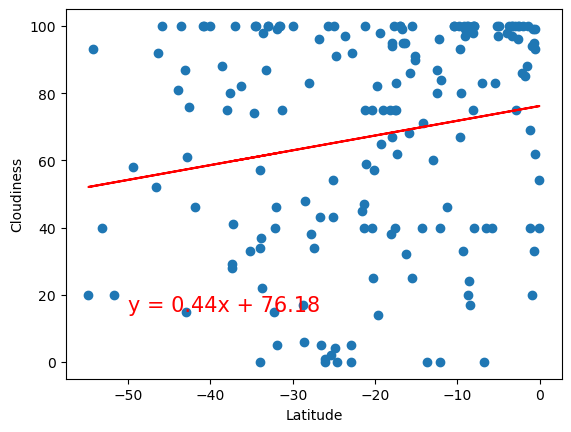

In [26]:
# Southern Hemisphere
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-50, 15), fontsize=15, color="red")
print(f'The r-value is {r_value}')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.02786363752083188


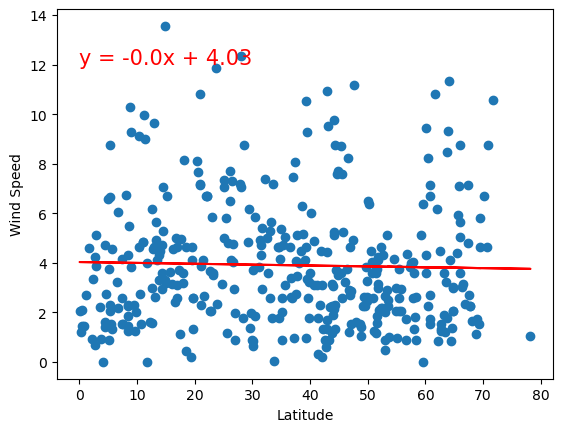

In [27]:
# Northern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (0, 12), fontsize=15, color="red")
print(f'The r-value is {r_value}')


The r-value is -0.3978896698580069


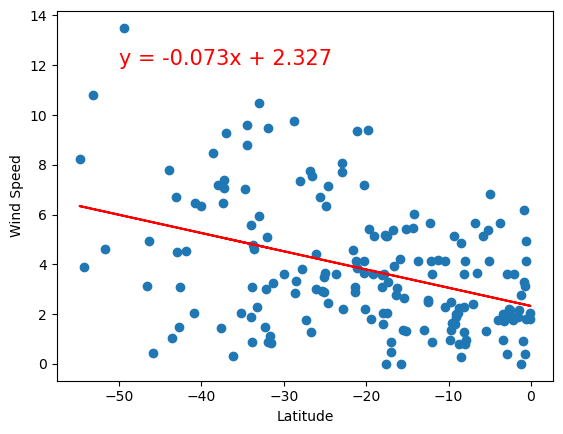

In [28]:
# Southern Hemisphere
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,3)}x + {round(intercept,3)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (-50, 12), fontsize=15, color="red")
print(f'The r-value is {r_value}')


**Discussion about the linear relationship:** YOUR RESPONSE HERE